<a href="https://colab.research.google.com/github/KS0999/ML/blob/KS0999-patch-1/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt

#weight & bias
weight = 0.3
bias= 0.9

start,step,end=0,0.02,1

X=torch.arange(start,end,step).unsqueeze(1)
y=X*weight+bias


In [ ]:
data_split=int(len(X)*0.8)
X_train,y_train=X[:data_split],y[:data_split]
X_test,y_test=X[data_split:],y[data_split:]

In [ ]:
def Linear_Regression(prediction=None):
  plt.figure(figsize=(10,7))
  plt.scatter(X_train,y_train,s=10,c="g",label="Train")
  plt.scatter(X_test,y_test,s=10,c="b",label="Test")
  if prediction is not None:
    plt.scatter(X_test,prediction,s=10,c="r",label="Prediction")
  plt.legend()
  plt.show()

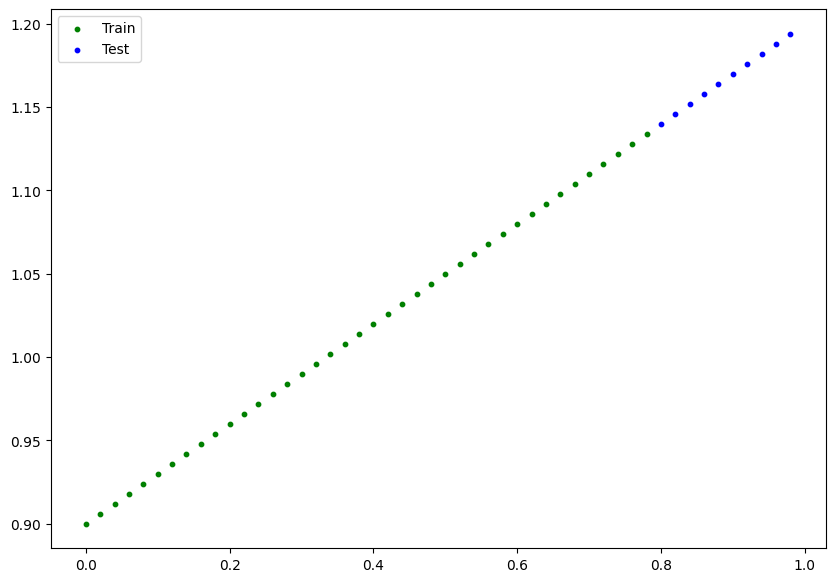

In [ ]:
Linear_Regression();

In [ ]:
import torch.nn as nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.Linear_layer=torch.nn.Linear(in_features=1,
                                      out_features=1)
  def forward(self,x):
    return self.Linear_layer(x)

In [ ]:
torch.manual_seed(1)
model=LinearRegressionModel()
model.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[0.5153]])),
             ('Linear_layer.bias', tensor([-0.4414]))])

In [ ]:
loss_function=nn.L1Loss()
optimizer=torch.optim.SGD(params=model.parameters(),
                          lr=0.01)

In [ ]:
epochs=500
for epochs in range(epochs):

  #training
  model.train()
  y_pred=model(X_train)
  loss=loss_function(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testing
  model.eval()
  with torch.inference_mode():
    y_preds=model(X_test)
    loss_2=loss_function(y_preds,y_test)
  if ((epochs % 50)==0):
    print(f"Epoch:{epochs},Loss={loss}")

Epoch:0,Loss=1.2574255466461182
Epoch:50,Loss=0.6813758611679077
Epoch:100,Loss=0.1565946340560913
Epoch:150,Loss=0.11057205498218536
Epoch:200,Loss=0.09316370636224747
Epoch:250,Loss=0.0759885236620903
Epoch:300,Loss=0.058813951909542084
Epoch:350,Loss=0.04164547473192215
Epoch:400,Loss=0.024477001279592514
Epoch:450,Loss=0.007303106598556042


In [ ]:
model.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[0.3011]])),
             ('Linear_layer.bias', tensor([0.8906]))])

In [ ]:
with torch.inference_mode():
  y_preds=model(X_test)
y_preds

tensor([[1.1315],
        [1.1375],
        [1.1435],
        [1.1495],
        [1.1555],
        [1.1616],
        [1.1676],
        [1.1736],
        [1.1796],
        [1.1857]])

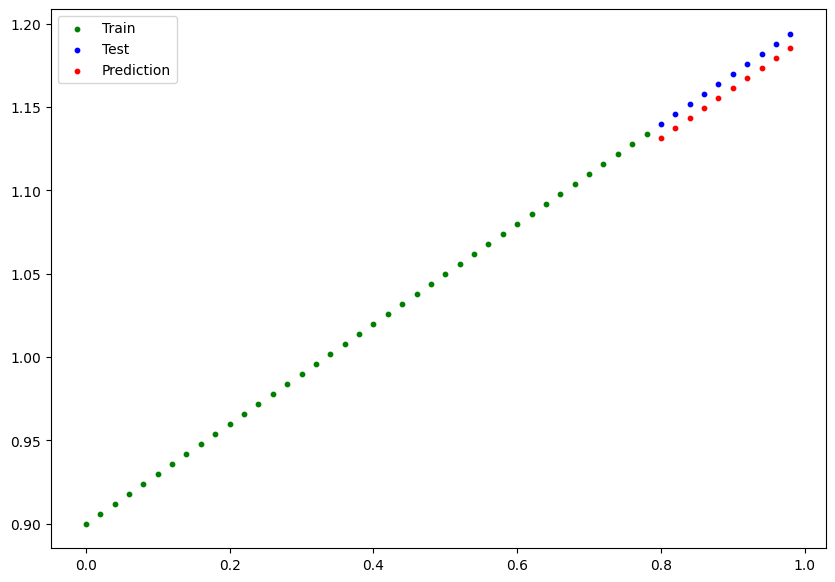

In [ ]:
Linear_Regression(prediction=y_preds);

In [ ]:
import torch
from pathlib import Path

model_path = Path("Model")
model_path.mkdir(parents=True, exist_ok=True)

model_name = "Exercise-LinearRegressionModel"
model_path_name = model_path / model_name

# 假設 model 是你的模型物件
torch.save(obj=model.state_dict(), f=str(model_path_name))


In [ ]:
import pathlib as Path

model_path = Path("Model")
model_path.mkdir(parents=True,
                 exist_ok=True)
model_name="Exercise-LinearRegressionModel"
model_path_name=model_path/model_name
torch.save(obj=model.state_dict(),
           f=model_path_name)

TypeError: ignored